<a href="https://colab.research.google.com/github/jkworldchampion/Military_CodingStudy/blob/main/deeplearning/chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요 라이브러리 다운로드
!pip install mglearn
# 쓸데 없는 경고 안뜨게 해줌
import warnings
warnings.filterwarnings('ignore')
# plt에 한글폰트 안깨지게 해줌
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

E: dpkg was interrupted, you must manually run 'sudo dpkg --configure -a' to correct the problem. 
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

## 2.3.1 예제에 사용할 데이터셋

x.shape: (26, 2)


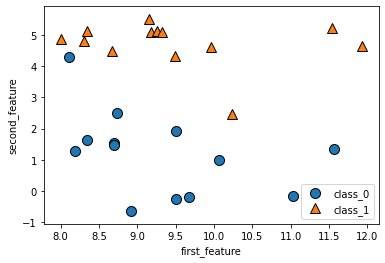

In [3]:
# 데이터셋을 만듭니다.
x, y = mglearn.datasets.make_forge()
# 산점도를 그립니다.
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.legend(["class_0", "class_1"], loc=4)
plt.xlabel("first_feature")
plt.ylabel("second_feature")
print("x.shape: {}".format(x.shape))

Text(0, 0.5, 'target')

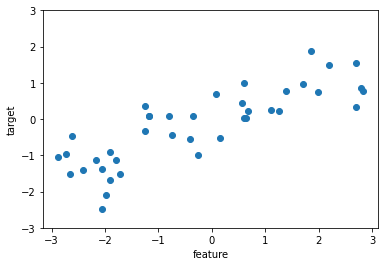

In [4]:
x, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(x, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("feature")
plt.ylabel("target")

In [5]:
from sklearn.datasets import load_breast_cancer

# 유방암 데이터셋
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print("유방암 데이터의 형태: {}".format(
    cancer.data.shape
))

유방암 데이터의 형태: (569, 30)


In [7]:
print("클래스별 샘플 개수:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))  # 212개 악성, 357개 양성

클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


In [8]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


In [10]:
x, y = mglearn.datasets.load_extended_boston()
print("x.shape: {}".format(x.shape))

x.shape: (506, 104)


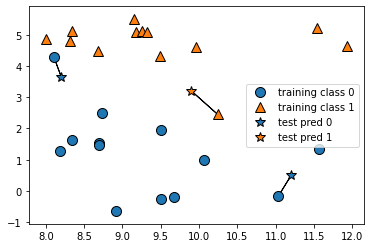

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

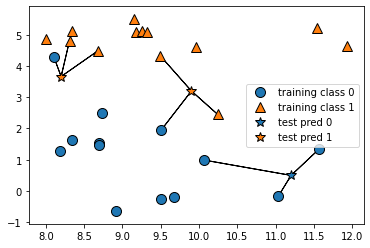

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split
x, y = mglearn.datasets.make_forge()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
# 테스트 데이터에 대해 predict 메서드를 호출해서 예측합니다. 테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산한 다음 가장 많은 클래스를 찾습니다.
print("테스트 세트 예측: {}".format(clf.predict(x_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [17]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(x_test, y_test)))

테스트 세트 정확도: 0.86


### KNeighborsClassifier 분

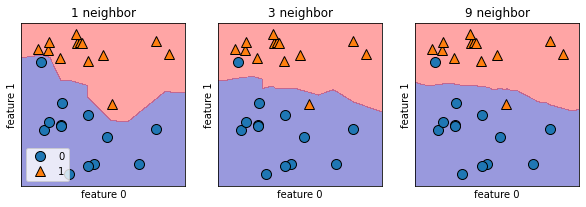

In [18]:
from sklearn import neighbors
# 직접 그려보기
fig, axes = plt.subplots(1, 3, figsize=(10, 3))  # fig = 바탕, axes = 축

for n_neighbors, ax in zip([1, 3, 9], axes):
  # fit 메서드는 self 객체를 반환합니다.
  # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있습니다.
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
  mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
  ax.set_title("{} neighbor".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

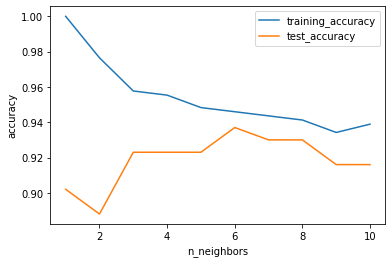

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(x_train, y_train)
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(x_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(x_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training_accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### K-최근접 이웃 회귀

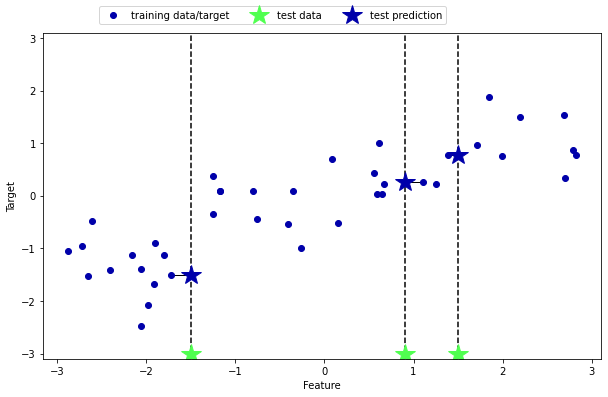

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

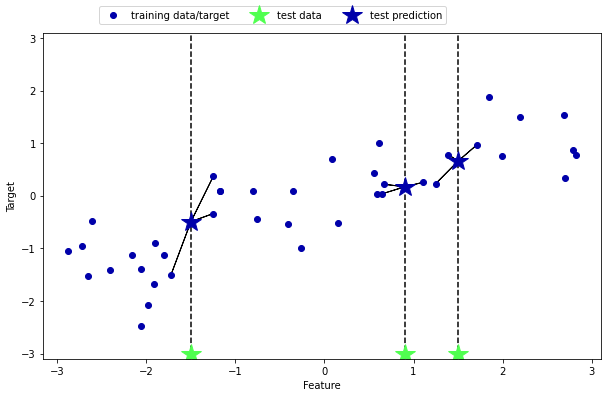

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

x, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련셋과 테스트 셋으로 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다.
reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [23]:
print("테스트 세트를 예측:\n{}".format(reg.predict(x_test)))

테스트 세트를 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [24]:
print("테스트 세트 r^2: {:.2f}".format(reg.score(x_test, y_test)))

테스트 세트 r^2: 0.83


### KNeighborsRegressior 분석

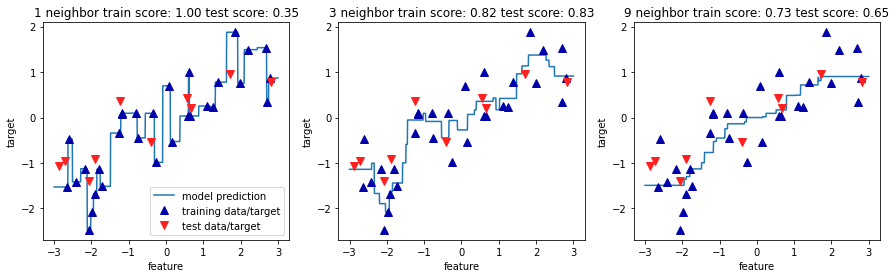

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1,000개의 데이터 포인트를 만듭니다.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
  # 1, 3, 9 이웃을 사용한 예측을 합니다.
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(x_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(x_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(x_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title(
      "{} neighbor train score: {:.2f} test score: {:.2f}".format(
          n_neighbors, reg.score(x_train, y_train),
          reg.score(x_test, y_test)
      )
  )
  ax.set_xlabel("feature")
  ax.set_ylabel("target")
axes[0].legend(["model prediction", "training data/target",
                "test data/target"], loc="best")

w[0]: 0.393906  b: -0.031804


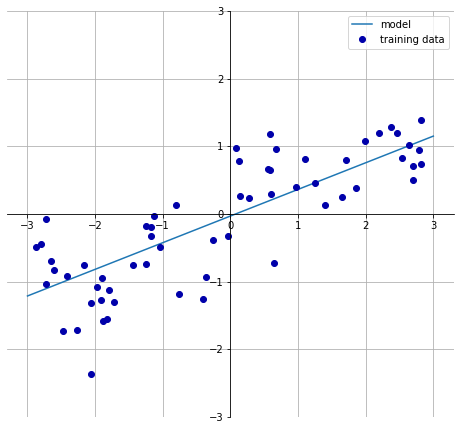

In [26]:
mglearn.plots.plot_linear_regression_wave()

In [27]:
from sklearn.linear_model import LinearRegression
x, y = mglearn.datasets.make_wave(n_samples=60)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

lr = LinearRegression().fit(x_train, y_train)

In [28]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [29]:
print("훈련 세트 점수: {:.2f}".format(lr.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(x_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [30]:
x, y = mglearn.datasets.load_extended_boston()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
lr = LinearRegression().fit(x_train, y_train)

In [31]:
print("훈련 세트 점수: {:.2f}".format(lr.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(x_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


### 릿지 회귀

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(x_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(x_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [33]:
ridge10 = Ridge(alpha=10).fit(x_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(x_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [34]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(x_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


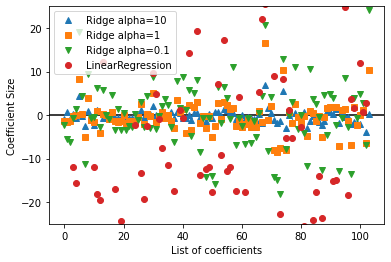

In [38]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("List of coefficients") # 계수 목록
plt.ylabel("Coefficient Size") # 계수 크기
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show() # 책에는 없음

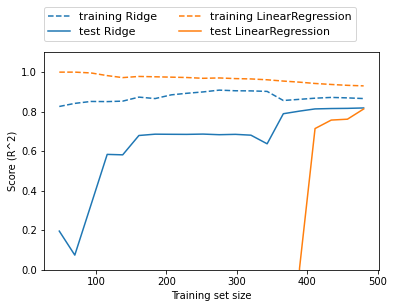

In [39]:
mglearn.plots.plot_ridge_n_samples()

### 라쏘

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(x_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [42]:
# max_iter 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(x_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(x_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [43]:
# alpha 값을 너무 줄이면 규제의 의미가 없어져 단순 선형 회귀와 비슷해진다.
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(x_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(x_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


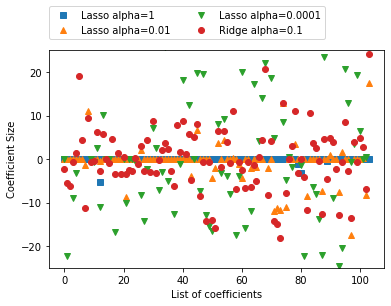

In [45]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("List of coefficients")  # 계수 목록
plt.ylabel("Coefficient Size")      # 계수 크기
plt.show() # 책에는 없음

### 분류용 선형 모델

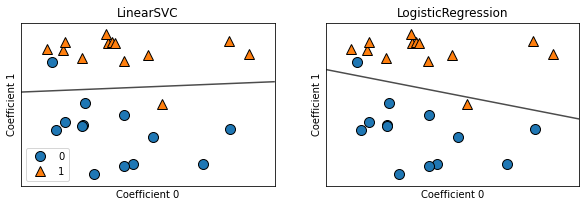

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Coefficient 0")
    ax.set_ylabel("Coefficient 1")
axes[0].legend()
plt.show() # 책에는 없음

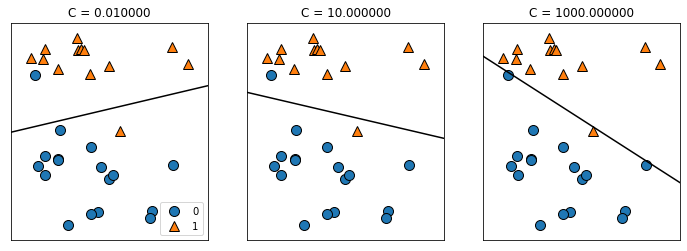

In [49]:
mglearn.plots.plot_linear_svc_regularization()  # 높은 c에 따라 훈련데이터에 더욱 타이트하게 맞춘다.

In [50]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [51]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.981
테스트 세트 점수: 0.965


In [53]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


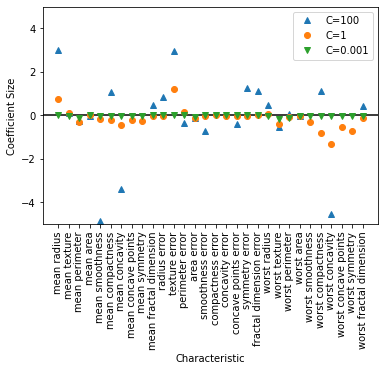

In [55]:
# L2 규제를 사용
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Characteristic")    # 특성
plt.ylabel("Coefficient Size")  # 계수 크기
plt.legend()
plt.show() # 책에는 없음

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


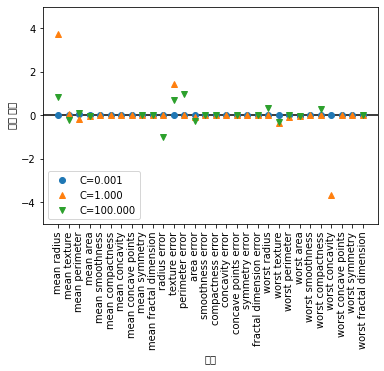

In [56]:
# L1 규제를 사용
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show() # 책에는 없음

In [57]:
### 다중 클래스 분류용 선형 모델

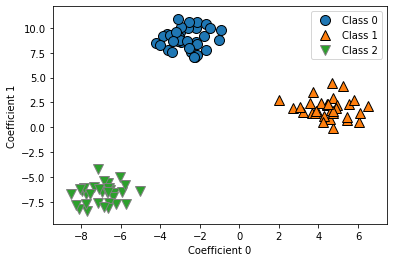

In [59]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Coefficient 0")
plt.ylabel("Coefficient 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show() # 책에는 없음

In [60]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


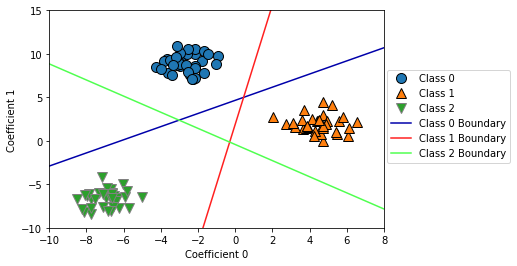

In [61]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors): 
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Coefficient 0")
plt.ylabel("Coefficient 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 0 Boundary', 'Class 1 Boundary',
            'Class 2 Boundary'], loc=(1.01, 0.3))
plt.show() # 책에는 없음

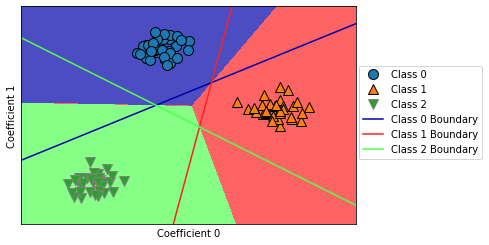

In [62]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 0 Boundary', 'Class 1 Boundary',
            'Class 2 Boundary'], loc=(1.01, 0.3))
plt.xlabel("Coefficient 0")
plt.ylabel("Coefficient 1")
plt.show() # 책에는 없음

### 장단점과 매개변수

In [63]:
# 한 줄에서 모델의 객체를 생성과 학습을 한번에 실행합니다
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

In [64]:
logreg = LogisticRegression(max_iter=5000)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [65]:
y_pred = LogisticRegression(max_iter=5000).fit(X_train, y_train).predict(X_test)

### 나이브 베이즈 분류기

In [66]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [67]:
counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1 이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n", counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
